In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
def read_data(url, header):
    # function for reading data
    df = pd.read_csv(url, header=header, index_col=0)
    return df

In [17]:
def add_noise(df,scorer,bodypart,coord,n, m, noise):
    # function for adding noise to the selected coordinate (coord) of a certain body part (bodypart)
    num = n+m
    df.loc[filenames[n:num],(scorer, bodypart, coord)] = df.loc[filenames[n:num],(scorer, bodypart, coord)] + np.abs(np.random.normal(0, 1, m)) * noise
    return df

In [18]:
def swap_ears(df,df_fake,scorer,n):
    # function for swapping two ears
    df_fake.loc[filenames[:n],(scorer, 'leftear', 'x')] = df.loc[filenames[:n],(scorer, 'rightear', 'x')]
    df_fake.loc[filenames[:n],(scorer, 'leftear', 'y')] = df.loc[filenames[:n],(scorer, 'rightear', 'y')]
    
    df_fake.loc[filenames[:n],(scorer, 'rightear', 'x')] = df.loc[filenames[:n],(scorer, 'leftear', 'x')]
    df_fake.loc[filenames[:n],(scorer, 'rightear', 'y')] = df.loc[filenames[:n],(scorer, 'leftear', 'y')]
    return df_fake

In [19]:
def comp_dist(features,df, scorer, bodypart1, bodypart2):
    # function for computing the distance between two body parts: bodypart1 and bodypart2
    name = bodypart1 + '_' + bodypart2
    features[name] = np.sqrt(np.square(df[scorer,bodypart1, 'x'] - df[scorer,bodypart2, 'x'])+np.square(df[scorer,bodypart1, 'y'] - df[scorer, bodypart2, 'y']))
    
    return features

In [20]:
def get_angle(name,features,df, scorer, bodypart3, bodypart2, bodypart1):
    # function for calculating the angle sign between 3 keypoints (if negative, swapping might have occured)
    features[name] = np.degrees(np.arctan2(df[scorer, bodypart3, 'y']-df[scorer,bodypart2, 'y'],df[scorer, bodypart3, 'x']-df[scorer,bodypart2, 'x']) - np.arctan2(df[scorer, bodypart1, 'y']-df[scorer,bodypart2, 'y'],df[scorer, bodypart1, 'x']-df[scorer,bodypart2, 'x']))
    return features

In [21]:
def get_anglesign(name,features,df, scorer, bodypart3, bodypart2, bodypart1):
    # function for calculating the angle sign between 3 keypoints (if negative, swapping might have occured)
    features[name] = np.sign(np.degrees(np.arctan2(df[scorer, bodypart3, 'y']-df[scorer,bodypart2, 'y'],df[scorer, bodypart3, 'x']-df[scorer,bodypart2, 'x']) - np.arctan2(df[scorer, bodypart1, 'y']-df[scorer,bodypart2, 'y'],df[scorer, bodypart1, 'x']-df[scorer,bodypart2, 'x'])))
    return features

In [22]:
def plot_ind(x_data,y_data,labels,cluster_n):
    # function for plotting indices
    pic_num = np.array(np.where(labels==cluster_n))    
    for i in pic_num[0,:]:
        plt.text(x_data[i]+0.1,y_data[i],i)
    return 

In [23]:
filename = 'https://raw.githubusercontent.com/DeepLabCut/DeepLabCut/master/examples/openfield-Pranav-2018-10-30/labeled-data/m4s1/CollectedData_Pranav.csv'
header = [0, 1, 2] ### if multi-animal project, header = [0, 1, 2, 3]

df = read_data(filename, header) # reading data
df

scorer                         Pranav                                     \
bodyparts                       snout          leftear          rightear   
coords                              x        y       x        y        x   
labeled-data/m4s1/img0000.png  21.521  265.428  33.819  265.941   19.984   
labeled-data/m4s1/img0001.png  10.248  288.487  19.984  297.198   12.298   
labeled-data/m4s1/img0002.png  24.596  354.075  38.431  354.075   23.058   
labeled-data/m4s1/img0003.png  73.787  374.572  78.911  366.373   57.390   
labeled-data/m4s1/img0004.png  38.431  333.066  50.729  341.777   39.968   
...                               ...      ...     ...      ...      ...   
labeled-data/m4s1/img0111.png  30.745   65.588  35.356   79.424   42.530   
labeled-data/m4s1/img0112.png  29.207  104.532  36.894  109.143   36.894   
labeled-data/m4s1/img0113.png  30.232  188.567  39.968  181.393   27.670   
labeled-data/m4s1/img0114.png  26.645  262.354  38.431  262.354   24.596   
labeled-data/m4s1/img0115.png  65.588  321.281  72.250  312.058   52.778   

scorer                                                    
bodyparts                              tailbase           
coords                               y        x        y  
labeled-data/m4s1/img0000.png  250.056   87.110  152.698  
labeled-data/m4s1/img0001.png  281.313   95.821  221.361  
labeled-data/m4s1/img0002.png  337.166   99.408  256.205  
labeled-data/m4s1/img0003.png  361.761  106.581  270.040  
labeled-data/m4s1/img0004.png  323.331  131.177  273.627  
...                                ...      ...      ...  
labeled-data/m4s1/img0111.png   60.977  138.863   97.870  
labeled-data/m4s1/img0112.png   89.672  143.987   89.159  
labeled-data/m4s1/img0113.png  167.046  112.218   96.845  
labeled-data/m4s1/img0114.png  248.519   84.548  155.773  
labeled-data/m4s1/img0115.png  306.934   92.746  192.154  

[116 rows x 8 columns]

In [24]:
filenames = df.index 
scorer = 'Pranav'

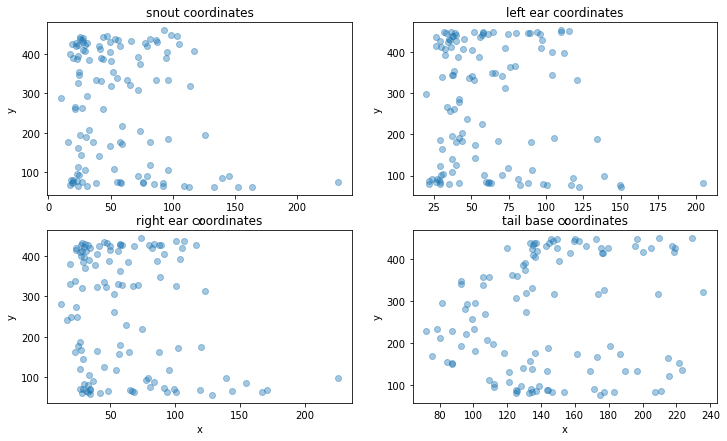

In [25]:
# data visualization
# here you can see x and y coordinates of the body parts where each point corresponds to one image

fig, axs = plt.subplots(2, 2, figsize=(12, 7))
axs[0, 0].scatter(df.loc[filenames[:],(scorer, 'snout', 'x')], df.loc[filenames[:],(scorer, 'snout', 'y')], alpha=0.4)
axs[0, 0].set_title ("snout coordinates")

axs[0, 1].scatter(df.loc[filenames[:],(scorer, 'leftear', 'x')], df.loc[filenames[:],(scorer, 'leftear', 'y')], alpha=0.4)
axs[0, 1].set_title ("left ear coordinates")

axs[1, 0].scatter(df.loc[filenames[:],(scorer, 'rightear', 'x')], df.loc[filenames[:],(scorer, 'rightear', 'y')], alpha=0.4)
axs[1, 0].set_title ("right ear coordinates")

axs[1, 1].scatter(df.loc[filenames[:],(scorer, 'tailbase', 'x')], df.loc[filenames[:],(scorer, 'tailbase', 'y')], alpha=0.4)
axs[1, 1].set_title ("tail base coordinates")

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')

In [26]:
# computing distances between all body parts to use these values as features in the future

df_features = pd.DataFrame()

df_features = comp_dist(df_features,df, scorer,'leftear', 'rightear')
df_features = comp_dist(df_features,df, scorer,'snout', 'tailbase')

df_features = comp_dist(df_features,df, scorer,'snout', 'leftear')
df_features = comp_dist(df_features,df, scorer,'snout', 'rightear')

df_features = comp_dist(df_features,df, scorer,'tailbase', 'leftear')
df_features = comp_dist(df_features,df, scorer,'tailbase', 'rightear')

df_features.head()

,leftear_rightear,snout_tailbase,snout_leftear,snout_rightear,tailbase_leftear,tailbase_rightear
labeled-data/m4s1/img0000.png,21.065148,130.422275,12.308695,15.448649,125.155534,118.255994
labeled-data/m4s1/img0001.png,17.646751,108.759543,13.064119,7.461151,107.249714,102.812129
labeled-data/m4s1/img0002.png,22.852646,123.188361,13.835000,16.978802,115.311454,111.283449
labeled-data/m4s1/img0003.png,22.009634,109.555399,9.668453,20.808251,100.228119,104.079279
labeled-data/m4s1/img0004.png,21.355422,110.158137,15.070578,9.855587,105.433881,103.872852


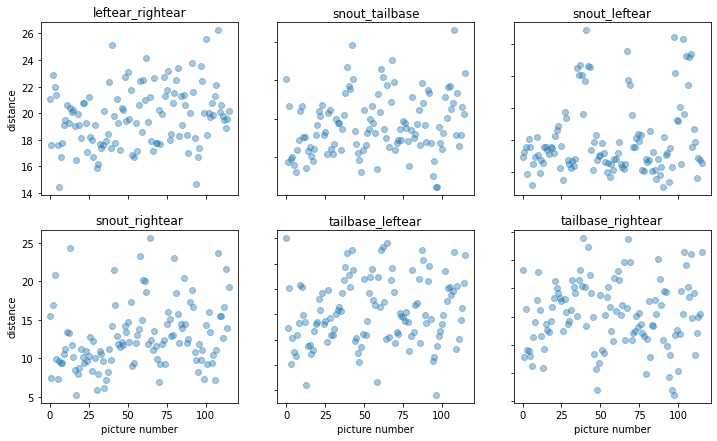

In [27]:
# visualization of distances in the original dataset

fig, axs = plt.subplots(2, 3, figsize=(12, 7))
ind = range(df.shape[0])
axs[0, 0].scatter(ind, df_features['leftear_rightear'], alpha=0.4)
axs[0, 0].set_title ("leftear_rightear")

axs[0, 1].scatter(ind, df_features['snout_tailbase'], alpha=0.4)
axs[0, 1].set_title ("snout_tailbase")

axs[0, 2].scatter(ind, df_features['snout_leftear'], alpha=0.4)
axs[0, 2].set_title ("snout_leftear")

axs[1, 0].scatter(ind, df_features['snout_rightear'], alpha=0.4)
axs[1, 0].set_title ("snout_rightear")

axs[1, 1].scatter(ind, df_features['tailbase_leftear'], alpha=0.4)
axs[1, 1].set_title ("tailbase_leftear")

axs[1, 2].scatter(ind, df_features['tailbase_rightear'], alpha=0.4)
axs[1, 2].set_title ("tailbase_rightear")

for ax in axs.flat:
    ax.set(xlabel='picture number', ylabel='distance')

for ax in axs.flat:
    ax.label_outer()

In [28]:
# calculating the angle sign between 3 keypoints: left ear, snout and right ear
df_features = get_anglesign('anglesign',df_features,df, scorer, 'leftear', 'snout', 'rightear')
df_features.head()

,leftear_rightear,snout_tailbase,snout_leftear,snout_rightear,tailbase_leftear,tailbase_rightear,anglesign
labeled-data/m4s1/img0000.png,21.065148,130.422275,12.308695,15.448649,125.155534,118.255994,1.0
labeled-data/m4s1/img0001.png,17.646751,108.759543,13.064119,7.461151,107.249714,102.812129,1.0
labeled-data/m4s1/img0002.png,22.852646,123.188361,13.835000,16.978802,115.311454,111.283449,1.0
labeled-data/m4s1/img0003.png,22.009634,109.555399,9.668453,20.808251,100.228119,104.079279,1.0
labeled-data/m4s1/img0004.png,21.355422,110.158137,15.070578,9.855587,105.433881,103.872852,1.0


In [29]:
# calculating the angle between 3 keypoints: left ear, snout and right ear
df_features = get_angle('angle',df_features,df, scorer, 'leftear', 'snout', 'rightear')
df_features.head()

,leftear_rightear,snout_tailbase,snout_leftear,snout_rightear,tailbase_leftear,tailbase_rightear,anglesign,angle
labeled-data/m4s1/img0000.png,21.065148,130.422275,12.308695,15.448649,125.155534,118.255994,1.0,98.098512
labeled-data/m4s1/img0001.png,17.646751,108.759543,13.064119,7.461151,107.249714,102.812129,1.0,115.872148
labeled-data/m4s1/img0002.png,22.852646,123.188361,13.835000,16.978802,115.311454,111.283449,1.0,95.197179
labeled-data/m4s1/img0003.png,22.009634,109.555399,9.668453,20.808251,100.228119,104.079279,1.0,84.002935
labeled-data/m4s1/img0004.png,21.355422,110.158137,15.070578,9.855587,105.433881,103.872852,1.0,116.338933


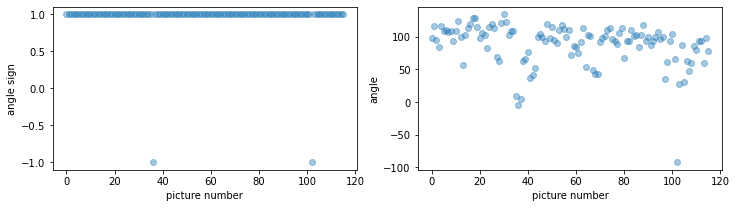

In [30]:
# visualization of the sign of angle and angle between three points: left ear, snout and right ear
# using the sign of angle we are able to detect the swapped ears even in the original dataset

fig, axs = plt.subplots(1, 2, figsize=(12, 3))
ind = range(df.shape[0])
axs[0].scatter(ind, df_features['anglesign'], alpha=0.4)
axs[0].set (ylabel="angle sign")

axs[1].scatter(ind, df_features['angle'], alpha=0.4)
axs[1].set (ylabel="angle")

for ax in axs.flat:
    ax.set(xlabel='picture number')

In [31]:
# two outliers in the original dataset
(df_features['anglesign'] < 0).sum()
print(df_features.loc[(df_features['anglesign'] < 0),'anglesign'])

labeled-data/m4s1/img0036.png   -1.0
labeled-data/m4s1/img0102.png   -1.0
Name: anglesign, dtype: float64


In [32]:
# adding corrupted data in the original dataset
bodypart = 'tailbase'
number_of_images_with_ears_swap = len(filenames) // 5 # 1/5 pictures with swap ears
number_of_images_with_noise = len(filenames) // 5 # 1/5 pictures with random noise

In [33]:
print('pictures with swap ears:', number_of_images_with_ears_swap)
print('pictures with fake noise:', number_of_images_with_noise)

pictures with swap ears: 23
pictures with fake noise: 23


In [34]:
# swap left and right ears
fake_data = df.copy(deep=True)
fake_data = swap_ears(df,fake_data,scorer,number_of_images_with_ears_swap)
fake_data.head(25)

scorer                          Pranav                                      \
bodyparts                        snout           leftear          rightear   
coords                               x        y        x        y        x   
labeled-data/m4s1/img0000.png   21.521  265.428   19.984  250.056   33.819   
labeled-data/m4s1/img0001.png   10.248  288.487   12.298  281.313   19.984   
labeled-data/m4s1/img0002.png   24.596  354.075   23.058  337.166   38.431   
labeled-data/m4s1/img0003.png   73.787  374.572   57.390  361.761   78.911   
labeled-data/m4s1/img0004.png   38.431  333.066   39.968  323.331   50.729   
labeled-data/m4s1/img0005.png   23.571  327.430   28.183  321.793   30.745   
labeled-data/m4s1/img0006.png   42.530  332.042   46.629  323.331   48.167   
labeled-data/m4s1/img0007.png   63.026  333.066   67.638  324.868   70.713   
labeled-data/m4s1/img0008.png   95.821  334.604  100.432  326.405  104.019   
labeled-data/m4s1/img0009.png  113.755  318.207  122.978  313.082  120.416   
labeled-data/m4s1/img0010.png   54.828  339.728   59.440  329.480   64.051   
labeled-data/m4s1/img0011.png   32.282  383.795   30.745  370.472   40.993   
labeled-data/m4s1/img0012.png   28.183  440.160   27.670  426.837   39.968   
labeled-data/m4s1/img0013.png   92.746  460.657   73.787  445.284   93.771   
labeled-data/m4s1/img0014.png   24.083  423.251   28.695  412.490   35.356   
labeled-data/m4s1/img0015.png   24.083  395.068   29.207  386.357   32.282   
labeled-data/m4s1/img0016.png   28.183  430.424   30.232  422.226   37.918   
labeled-data/m4s1/img0017.png   49.191  430.937   50.216  425.813   57.390   
labeled-data/m4s1/img0018.png   66.101  433.499   68.151  425.813   74.299   
labeled-data/m4s1/img0019.png   86.085  435.036   89.159  426.837   95.821   
labeled-data/m4s1/img0020.png  103.507  446.821  106.581  436.061  115.292   
labeled-data/m4s1/img0021.png   53.803  437.086   58.927  428.375   64.564   
labeled-data/m4s1/img0022.png   26.645  435.548   32.794  428.375   36.381   
labeled-data/m4s1/img0023.png   29.207  407.878   34.331  424.275   39.968   
labeled-data/m4s1/img0024.png   22.546  419.151   29.207  427.350   26.645   

scorer                                                    
bodyparts                              tailbase           
coords                               y        x        y  
labeled-data/m4s1/img0000.png  265.941   87.110  152.698  
labeled-data/m4s1/img0001.png  297.198   95.821  221.361  
labeled-data/m4s1/img0002.png  354.075   99.408  256.205  
labeled-data/m4s1/img0003.png  366.373  106.581  270.040  
labeled-data/m4s1/img0004.png  341.777  131.177  273.627  
labeled-data/m4s1/img0005.png  339.215  131.177  318.719  
labeled-data/m4s1/img0006.png  337.678  147.574  316.157  
labeled-data/m4s1/img0007.png  341.265  173.707  316.669  
labeled-data/m4s1/img0008.png  343.827  209.063  317.694  
labeled-data/m4s1/img0009.png  332.042  235.709  320.256  
labeled-data/m4s1/img0010.png  348.439  177.294  326.405  
labeled-data/m4s1/img0011.png  388.407  134.764  331.017  
labeled-data/m4s1/img0012.png  441.697  109.143  358.175  
labeled-data/m4s1/img0013.png  449.384  125.540  358.687  
labeled-data/m4s1/img0014.png  431.449  130.665  390.456  
labeled-data/m4s1/img0015.png  406.341  136.301  405.316  
labeled-data/m4s1/img0016.png  439.648  137.838  418.639  
labeled-data/m4s1/img0017.png  440.673  156.797  413.515  
labeled-data/m4s1/img0018.png  444.772  176.781  415.052  
labeled-data/m4s1/img0019.png  444.772  200.352  417.102  
labeled-data/m4s1/img0020.png  451.946  218.287  417.614  
labeled-data/m4s1/img0021.png  448.359  175.244  425.300  
labeled-data/m4s1/img0022.png  448.871  147.062  441.697  
labeled-data/m4s1/img0023.png  405.829  146.037  448.359  
labeled-data/m4s1/img0024.png  410.440  136.813  437.086

In [35]:
# adding random noise
fake_data = add_noise(fake_data,scorer,bodypart,'x',number_of_images_with_ears_swap,number_of_images_with_noise,100)
fake_data = add_noise(fake_data,scorer,bodypart,'y',number_of_images_with_ears_swap,number_of_images_with_noise,100)
fake_data.head(25)

scorer                          Pranav                                      \
bodyparts                        snout           leftear          rightear   
coords                               x        y        x        y        x   
labeled-data/m4s1/img0000.png   21.521  265.428   19.984  250.056   33.819   
labeled-data/m4s1/img0001.png   10.248  288.487   12.298  281.313   19.984   
labeled-data/m4s1/img0002.png   24.596  354.075   23.058  337.166   38.431   
labeled-data/m4s1/img0003.png   73.787  374.572   57.390  361.761   78.911   
labeled-data/m4s1/img0004.png   38.431  333.066   39.968  323.331   50.729   
labeled-data/m4s1/img0005.png   23.571  327.430   28.183  321.793   30.745   
labeled-data/m4s1/img0006.png   42.530  332.042   46.629  323.331   48.167   
labeled-data/m4s1/img0007.png   63.026  333.066   67.638  324.868   70.713   
labeled-data/m4s1/img0008.png   95.821  334.604  100.432  326.405  104.019   
labeled-data/m4s1/img0009.png  113.755  318.207  122.978  313.082  120.416   
labeled-data/m4s1/img0010.png   54.828  339.728   59.440  329.480   64.051   
labeled-data/m4s1/img0011.png   32.282  383.795   30.745  370.472   40.993   
labeled-data/m4s1/img0012.png   28.183  440.160   27.670  426.837   39.968   
labeled-data/m4s1/img0013.png   92.746  460.657   73.787  445.284   93.771   
labeled-data/m4s1/img0014.png   24.083  423.251   28.695  412.490   35.356   
labeled-data/m4s1/img0015.png   24.083  395.068   29.207  386.357   32.282   
labeled-data/m4s1/img0016.png   28.183  430.424   30.232  422.226   37.918   
labeled-data/m4s1/img0017.png   49.191  430.937   50.216  425.813   57.390   
labeled-data/m4s1/img0018.png   66.101  433.499   68.151  425.813   74.299   
labeled-data/m4s1/img0019.png   86.085  435.036   89.159  426.837   95.821   
labeled-data/m4s1/img0020.png  103.507  446.821  106.581  436.061  115.292   
labeled-data/m4s1/img0021.png   53.803  437.086   58.927  428.375   64.564   
labeled-data/m4s1/img0022.png   26.645  435.548   32.794  428.375   36.381   
labeled-data/m4s1/img0023.png   29.207  407.878   34.331  424.275   39.968   
labeled-data/m4s1/img0024.png   22.546  419.151   29.207  427.350   26.645   

scorer                                                          
bodyparts                                 tailbase              
coords                               y           x           y  
labeled-data/m4s1/img0000.png  265.941   87.110000  152.698000  
labeled-data/m4s1/img0001.png  297.198   95.821000  221.361000  
labeled-data/m4s1/img0002.png  354.075   99.408000  256.205000  
labeled-data/m4s1/img0003.png  366.373  106.581000  270.040000  
labeled-data/m4s1/img0004.png  341.777  131.177000  273.627000  
labeled-data/m4s1/img0005.png  339.215  131.177000  318.719000  
labeled-data/m4s1/img0006.png  337.678  147.574000  316.157000  
labeled-data/m4s1/img0007.png  341.265  173.707000  316.669000  
labeled-data/m4s1/img0008.png  343.827  209.063000  317.694000  
labeled-data/m4s1/img0009.png  332.042  235.709000  320.256000  
labeled-data/m4s1/img0010.png  348.439  177.294000  326.405000  
labeled-data/m4s1/img0011.png  388.407  134.764000  331.017000  
labeled-data/m4s1/img0012.png  441.697  109.143000  358.175000  
labeled-data/m4s1/img0013.png  449.384  125.540000  358.687000  
labeled-data/m4s1/img0014.png  431.449  130.665000  390.456000  
labeled-data/m4s1/img0015.png  406.341  136.301000  405.316000  
labeled-data/m4s1/img0016.png  439.648  137.838000  418.639000  
labeled-data/m4s1/img0017.png  440.673  156.797000  413.515000  
labeled-data/m4s1/img0018.png  444.772  176.781000  415.052000  
labeled-data/m4s1/img0019.png  444.772  200.352000  417.102000  
labeled-data/m4s1/img0020.png  451.946  218.287000  417.614000  
labeled-data/m4s1/img0021.png  448.359  175.244000  425.300000  
labeled-data/m4s1/img0022.png  448.871  147.062000  441.697000  
labeled-data/m4s1/img0023.png  405.829  291.250002  462.503773  
labeled-data/m4s1/img0024.png  410.440  165.059178  445.8169

In [36]:
# calculating of distances in the dataset with corrupted data

features_fakedf = pd.DataFrame()

features_fakedf = comp_dist(features_fakedf,fake_data, scorer,'leftear', 'rightear')
features_fakedf = comp_dist(features_fakedf,fake_data, scorer,'snout', 'tailbase')

features_fakedf = comp_dist(features_fakedf,fake_data, scorer,'snout', 'leftear')
features_fakedf = comp_dist(features_fakedf,fake_data, scorer,'snout', 'rightear')

features_fakedf = comp_dist(features_fakedf,fake_data, scorer,'tailbase', 'leftear')
features_fakedf = comp_dist(features_fakedf,fake_data, scorer,'tailbase', 'rightear')

features_fakedf.head()

,leftear_rightear,snout_tailbase,snout_leftear,snout_rightear,tailbase_leftear,tailbase_rightear
labeled-data/m4s1/img0000.png,21.065148,130.422275,15.448649,12.308695,118.255994,125.155534
labeled-data/m4s1/img0001.png,17.646751,108.759543,7.461151,13.064119,102.812129,107.249714
labeled-data/m4s1/img0002.png,22.852646,123.188361,16.978802,13.835000,111.283449,115.311454
labeled-data/m4s1/img0003.png,22.009634,109.555399,20.808251,9.668453,104.079279,100.228119
labeled-data/m4s1/img0004.png,21.355422,110.158137,9.855587,15.070578,103.872852,105.433881


In [37]:
# calculating the angle sign in the corrupted dataset between 3 keypoints: left ear, snout and right ear
features_fakedf = get_anglesign('anglesign',features_fakedf,fake_data, scorer, 'leftear', 'snout', 'rightear')
features_fakedf.head(25)

,leftear_rightear,snout_tailbase,snout_leftear,snout_rightear,tailbase_leftear,tailbase_rightear,anglesign
labeled-data/m4s1/img0000.png,21.065148,130.422275,15.448649,12.308695,118.255994,125.155534,-1.0
labeled-data/m4s1/img0001.png,17.646751,108.759543,7.461151,13.064119,102.812129,107.249714,-1.0
labeled-data/m4s1/img0002.png,22.852646,123.188361,16.978802,13.835000,111.283449,115.311454,-1.0
labeled-data/m4s1/img0003.png,22.009634,109.555399,20.808251,9.668453,104.079279,100.228119,-1.0
labeled-data/m4s1/img0004.png,21.355422,110.158137,9.855587,15.070578,103.872852,105.433881,-1.0
labeled-data/m4s1/img0005.png,17.609370,107.958014,7.283290,13.796829,103.039864,102.502062,-1.0
labeled-data/m4s1/img0006.png,14.429201,106.238294,9.627218,7.971215,101.199601,101.709907,-1.0
labeled-data/m4s1/img0007.png,16.682843,111.888987,9.406261,11.238931,106.385414,105.890166,-1.0
labeled-data/m4s1/img0008.png,17.787430,114.497592,9.406642,12.339811,108.979703,108.245904,-1.0
labeled-data/m4s1/img0009.png,19.132314,121.971212,10.551273,15.355004,112.959040,115.893855,-1.0


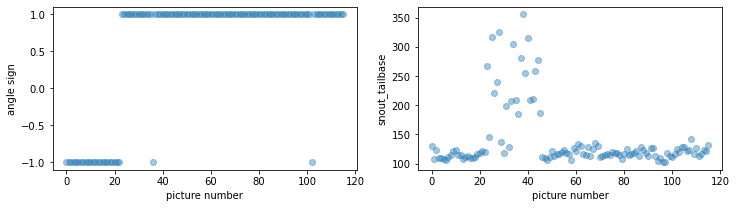

In [38]:
# visualization of the sign of angle between three points (left ear, snout and right ear) in the corrupted dataset and
# visualization of the distance between snout and tail base keypoints for each image

fig, axs = plt.subplots(1, 2, figsize=(12, 3))
ind = range(df.shape[0])

axs[0].scatter(ind, features_fakedf['anglesign'], alpha=0.4)
axs[0].set (ylabel="angle sign")

axs[1].scatter(ind, features_fakedf['snout_tailbase'], alpha=0.4)
axs[1].set (ylabel="snout_tailbase")

for ax in axs.flat:
    ax.set(xlabel='picture number')


In [42]:
print("Number of images with negative angles between three key points (left ear, snout and right ear): ",(features_fakedf['anglesign'] < 0).sum())
print(features_fakedf.loc[(features_fakedf['anglesign'] < 0),'anglesign'])

Number of images with negative angles between three key points (left ear, snout and right ear):  25
labeled-data/m4s1/img0000.png   -1.0
labeled-data/m4s1/img0001.png   -1.0
labeled-data/m4s1/img0002.png   -1.0
labeled-data/m4s1/img0003.png   -1.0
labeled-data/m4s1/img0004.png   -1.0
labeled-data/m4s1/img0005.png   -1.0
labeled-data/m4s1/img0006.png   -1.0
labeled-data/m4s1/img0007.png   -1.0
labeled-data/m4s1/img0008.png   -1.0
labeled-data/m4s1/img0009.png   -1.0
labeled-data/m4s1/img0010.png   -1.0
labeled-data/m4s1/img0011.png   -1.0
labeled-data/m4s1/img0012.png   -1.0
labeled-data/m4s1/img0013.png   -1.0
labeled-data/m4s1/img0014.png   -1.0
labeled-data/m4s1/img0015.png   -1.0
labeled-data/m4s1/img0016.png   -1.0
labeled-data/m4s1/img0017.png   -1.0
labeled-data/m4s1/img0018.png   -1.0
labeled-data/m4s1/img0019.png   -1.0
labeled-data/m4s1/img0020.png   -1.0
labeled-data/m4s1/img0021.png   -1.0
labeled-data/m4s1/img0022.png   -1.0
labeled-data/m4s1/img0036.png   -1.0
labeled-data

In [45]:
# calculating the angle in the corrupted dataset between 3 keypoints: left ear, snout and right ear
features_swapears = get_angle('angle',features_fakedf,fake_data, scorer, 'leftear', 'snout', 'rightear')
features_swapears.head(30)

,leftear_rightear,snout_tailbase,snout_leftear,snout_rightear,tailbase_leftear,tailbase_rightear,anglesign,angle
labeled-data/m4s1/img0000.png,21.065148,130.422275,15.448649,12.308695,118.255994,125.155534,-1.0,-98.098512
labeled-data/m4s1/img0001.png,17.646751,108.759543,7.461151,13.064119,102.812129,107.249714,-1.0,-115.872148
labeled-data/m4s1/img0002.png,22.852646,123.188361,16.978802,13.835000,111.283449,115.311454,-1.0,-95.197179
labeled-data/m4s1/img0003.png,22.009634,109.555399,20.808251,9.668453,104.079279,100.228119,-1.0,-84.002935
labeled-data/m4s1/img0004.png,21.355422,110.158137,9.855587,15.070578,103.872852,105.433881,-1.0,-116.338933
labeled-data/m4s1/img0005.png,17.609370,107.958014,7.283290,13.796829,103.039864,102.502062,-1.0,-109.380603
labeled-data/m4s1/img0006.png,14.429201,106.238294,9.627218,7.971215,101.199601,101.709907,-1.0,-109.795378
labeled-data/m4s1/img0007.png,16.682843,111.888987,9.406261,11.238931,106.385414,105.890166,-1.0,-107.484911
labeled-data/m4s1/img0008.png,17.787430,114.497592,9.406642,12.339811,108.979703,108.245904,-1.0,-109.014455
labeled-data/m4s1/img0009.png,19.132314,121.971212,10.551273,15.355004,112.959040,115.893855,-1.0,-93.350921


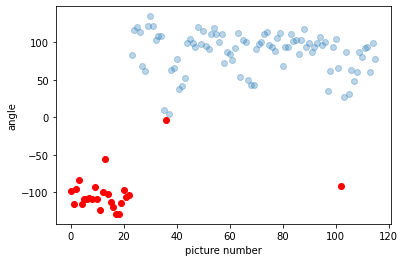

In [46]:
# visualization of the angles in the corrupted dataset between 3 keypoints: left ear, snout and right ear
# red points denote images with corrupted data

names_data = np.where((features_fakedf['anglesign'] > 0))
names_outliers = np.where((features_fakedf['anglesign'] < 0))
plt.scatter(names_data, features_fakedf.loc[(features_fakedf['anglesign'] > 0),'angle'], alpha=.3)
plt.scatter(names_outliers, features_fakedf.loc[(features_fakedf['anglesign'] < 0),'angle'], color='red')
plt.xlabel('picture number')
plt.ylabel('angle')
plt.show()

In [47]:
from sklearn.preprocessing import StandardScaler

# standardization of the data 
x1 = StandardScaler().fit_transform(features_fakedf) 
features_noise = pd.DataFrame(x1)
features_noise.columns = features_fakedf.columns

features_noise.head(25)

,leftear_rightear,snout_tailbase,snout_leftear,snout_rightear,tailbase_leftear,tailbase_rightear,anglesign,angle
0,0.570611,-0.186229,0.114239,-0.216678,-0.271744,-0.135216,-1.907878,-1.765842
1,-0.954158,-0.580997,-1.190209,-0.019469,-0.558747,-0.460093,-1.907878,-1.983015
2,1.367921,-0.318055,0.364131,0.181774,-0.401319,-0.313824,-1.907878,-1.730392
3,0.991897,-0.566494,0.989523,-0.905931,-0.535199,-0.587491,-1.907878,-1.593611
4,0.700087,-0.555510,-0.799171,0.504330,-0.539035,-0.493039,-1.907878,-1.988718
5,-0.970832,-0.595604,-1.219256,0.171809,-0.554515,-0.546233,-1.907878,-1.903696
6,-2.389340,-0.626943,-0.836466,-1.349006,-0.588714,-0.560606,-1.907878,-1.908764
7,-1.384108,-0.523968,-0.872551,-0.495947,-0.492343,-0.484760,-1.907878,-1.880533
8,-0.891409,-0.476430,-0.872489,-0.208555,-0.444131,-0.442019,-1.907878,-1.899222
9,-0.291526,-0.340236,-0.685558,0.578581,-0.370181,-0.303257,-1.907878,-1.707833


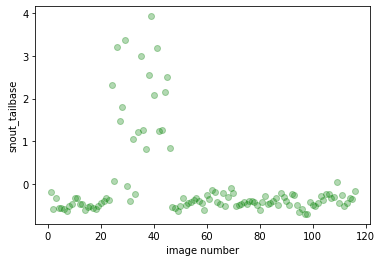

In [48]:
# visualization of the standardized distance between snout and tail base keypoints for each image

names = list(range(1, features_fakedf.shape[0]+1))
plt.scatter(names, features_noise['snout_tailbase'], alpha=.3, color='green')
plt.xlabel('image number')
plt.ylabel('snout_tailbase')
plt.show()

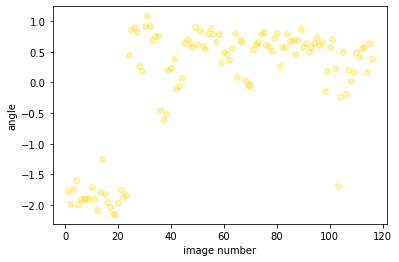

In [50]:
# visualization of the standardized angle between three points (left ear, snout and right ear) in the corrupted dataset

plt.scatter(names, features_noise[['angle']], alpha=.3, color='gold')
plt.xlabel('image number')
plt.ylabel('angle')
plt.show()

In [52]:
from sklearn.decomposition import PCA

# PCA projection to 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x1)

# putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

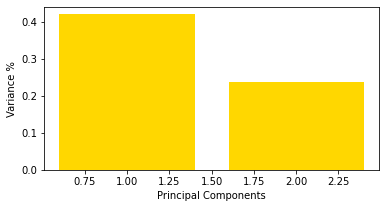

In [53]:
import matplotlib.pyplot as plt

# plotting the variances for each PC
PC = range(1, pca.n_components_+1)

plt.figure(figsize=(6, 3))
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')

plt.show()

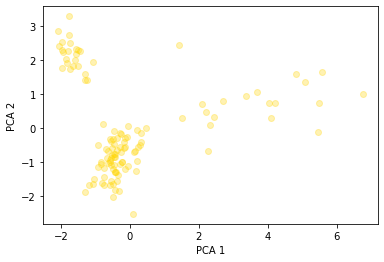

In [54]:
# visualization of data projected onto the first two PCA components

plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [55]:
# k-means clustering applied to the data set with 40% of corrupted images

from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
data = features_fakedf
model.fit_predict(data)
labels = model.labels_

# PCA projection to 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)

# putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

x_data = PCA_components[0]
y_data = PCA_components[1]

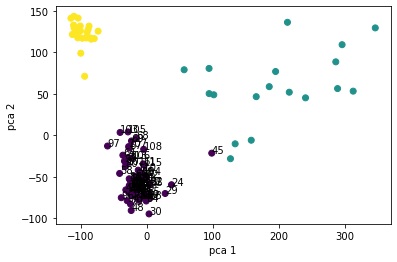

In [56]:
# results of k-means clustering 

plot_ind(x_data,y_data,labels,0)
plt.scatter(x_data, y_data, c=labels)
plt.xlabel('pca 1')
plt.ylabel('pca 2')

plt.show()

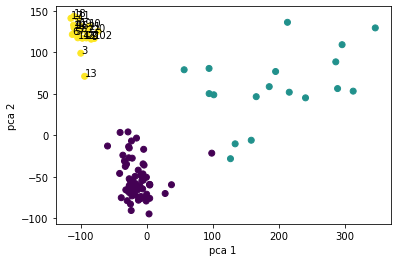

In [57]:
# results of k-means clustering 

plot_ind(x_data,y_data,labels,2)
plt.scatter(x_data, y_data, c=labels)
plt.xlabel('pca 1')
plt.ylabel('pca 2')
plt.show()

In [58]:
print("Images in the zero cluster: ", df.index[np.where(labels == 0)])

Imades in the zero cluster:  Index(['labeled-data/m4s1/img0024.png', 'labeled-data/m4s1/img0029.png',
       'labeled-data/m4s1/img0030.png', 'labeled-data/m4s1/img0032.png',
       'labeled-data/m4s1/img0045.png', 'labeled-data/m4s1/img0046.png',
       'labeled-data/m4s1/img0047.png', 'labeled-data/m4s1/img0048.png',
       'labeled-data/m4s1/img0049.png', 'labeled-data/m4s1/img0050.png',
       'labeled-data/m4s1/img0051.png', 'labeled-data/m4s1/img0052.png',
       'labeled-data/m4s1/img0053.png', 'labeled-data/m4s1/img0054.png',
       'labeled-data/m4s1/img0055.png', 'labeled-data/m4s1/img0056.png',
       'labeled-data/m4s1/img0057.png', 'labeled-data/m4s1/img0058.png',
       'labeled-data/m4s1/img0059.png', 'labeled-data/m4s1/img0060.png',
       'labeled-data/m4s1/img0061.png', 'labeled-data/m4s1/img0062.png',
       'labeled-data/m4s1/img0063.png', 'labeled-data/m4s1/img0064.png',
       'labeled-data/m4s1/img0065.png', 'labeled-data/m4s1/img0066.png',
       'labeled-data/m

In [59]:
print("Images in the first cluster: ",df.index[np.where(labels == 1)])

Images in the first cluster:  Index(['labeled-data/m4s1/img0023.png', 'labeled-data/m4s1/img0025.png',
       'labeled-data/m4s1/img0026.png', 'labeled-data/m4s1/img0027.png',
       'labeled-data/m4s1/img0028.png', 'labeled-data/m4s1/img0031.png',
       'labeled-data/m4s1/img0033.png', 'labeled-data/m4s1/img0034.png',
       'labeled-data/m4s1/img0035.png', 'labeled-data/m4s1/img0036.png',
       'labeled-data/m4s1/img0037.png', 'labeled-data/m4s1/img0038.png',
       'labeled-data/m4s1/img0039.png', 'labeled-data/m4s1/img0040.png',
       'labeled-data/m4s1/img0041.png', 'labeled-data/m4s1/img0042.png',
       'labeled-data/m4s1/img0043.png', 'labeled-data/m4s1/img0044.png'],
      dtype='object')


In [60]:
print("Images in the second cluster: ",df.index[np.where(labels == 2)])

Images in the first cluster:  Index(['labeled-data/m4s1/img0000.png', 'labeled-data/m4s1/img0001.png',
       'labeled-data/m4s1/img0002.png', 'labeled-data/m4s1/img0003.png',
       'labeled-data/m4s1/img0004.png', 'labeled-data/m4s1/img0005.png',
       'labeled-data/m4s1/img0006.png', 'labeled-data/m4s1/img0007.png',
       'labeled-data/m4s1/img0008.png', 'labeled-data/m4s1/img0009.png',
       'labeled-data/m4s1/img0010.png', 'labeled-data/m4s1/img0011.png',
       'labeled-data/m4s1/img0012.png', 'labeled-data/m4s1/img0013.png',
       'labeled-data/m4s1/img0014.png', 'labeled-data/m4s1/img0015.png',
       'labeled-data/m4s1/img0016.png', 'labeled-data/m4s1/img0017.png',
       'labeled-data/m4s1/img0018.png', 'labeled-data/m4s1/img0019.png',
       'labeled-data/m4s1/img0020.png', 'labeled-data/m4s1/img0021.png',
       'labeled-data/m4s1/img0022.png', 'labeled-data/m4s1/img0102.png'],
      dtype='object')


In [45]:
print('mean: ', bodypart, 'x')
print(np.mean(df.loc[filenames,(scorer, bodypart, 'x')]))

print('mean: ', bodypart, 'y')
print(np.mean(df.loc[filenames,(scorer, bodypart, 'y')]) )

mean:  tailbase x
144.86622413793103
mean:  tailbase y
266.7491206896551


In [46]:
ind_noise = [23,25,36]
print('original dataset')
print(df.loc[filenames[ind_noise],(scorer, bodypart, 'x')] )
print(df.loc[filenames[ind_noise],(scorer, bodypart, 'y')] )


original dataset
labeled-data/m4s1/img0023.png    146.037
labeled-data/m4s1/img0025.png    135.276
labeled-data/m4s1/img0036.png    172.170
Name: (Pranav, tailbase, x), dtype: float64
labeled-data/m4s1/img0023.png    448.359
labeled-data/m4s1/img0025.png    431.962
labeled-data/m4s1/img0036.png    447.846
Name: (Pranav, tailbase, y), dtype: float64


In [47]:
print('fake dataset')
print(fake_data.loc[filenames[ind_noise],(scorer, bodypart, 'x')] )
print(fake_data.loc[filenames[ind_noise],(scorer, bodypart, 'y')] )

fake dataset
labeled-data/m4s1/img0023.png    238.863954
labeled-data/m4s1/img0025.png    367.156100
labeled-data/m4s1/img0036.png    205.630842
Name: (Pranav, tailbase, x), dtype: float64
labeled-data/m4s1/img0023.png    537.676352
labeled-data/m4s1/img0025.png    479.984387
labeled-data/m4s1/img0036.png    466.597651
Name: (Pranav, tailbase, y), dtype: float64


In [48]:
print('difference')
print(np.abs(df.loc[filenames[ind_noise],(scorer, bodypart, 'x')] - fake_data.loc[filenames[ind_noise],(scorer, bodypart, 'x')] ))
print(np.abs(df.loc[filenames[ind_noise],(scorer, bodypart, 'y')] - fake_data.loc[filenames[ind_noise],(scorer, bodypart, 'y')] ))

difference
labeled-data/m4s1/img0023.png     92.826954
labeled-data/m4s1/img0025.png    231.880100
labeled-data/m4s1/img0036.png     33.460842
Name: (Pranav, tailbase, x), dtype: float64
labeled-data/m4s1/img0023.png    89.317352
labeled-data/m4s1/img0025.png    48.022387
labeled-data/m4s1/img0036.png    18.751651
Name: (Pranav, tailbase, y), dtype: float64


In [49]:
print('max difference')
print(np.max(np.abs(df.loc[filenames[ind_noise],(scorer, bodypart, 'x')] - fake_data.loc[filenames[ind_noise],(scorer, bodypart, 'x')] )))
print(np.max(np.abs(df.loc[filenames[ind_noise],(scorer, bodypart, 'y')] - fake_data.loc[filenames[ind_noise],(scorer, bodypart, 'y')] )))

max difference
231.88010017105927
89.31735162449496


In [51]:
'''
Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

The main concept of DBSCAN algorithm is to locate regions of high density 
that are separated from one another by regions of low density 

'''

'\nDensity-Based Spatial Clustering of Applications with Noise (DBSCAN)\n\nThe main concept of DBSCAN algorithm is to locate regions of high density \nthat are separated from one another by regions of low density \n\n'

In [66]:
def show_clusters(X, cluster):
    # function for visualization of clusters after applying DBSCAN clustering
    df = X
    df.loc[:,'label'] = cluster
    colors = {-1: 'red', 0: 'blue', 1:'orange', 2:'green', 3:'yellow', 4:'black', 5:'gold', 6:'lightblue', 7:'darkgreen'}
    fig, ax = plt.subplots(figsize=(8,8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x=0, y=1, label=key, color=colors[key])
    plt.xlabel('pca 1')
    plt.ylabel('pca 2')
    plt.show()

In [67]:
# DBSCAN clustering applied to the data set with 40% of corrupted images

from sklearn.cluster import DBSCAN

# min_samples = the minimum number of core points needed in order to form a cluster
# eps = the maximum distance between two samples for them to be considered as in the same cluster

dbscan=DBSCAN(eps = 45, min_samples = 20)

# fit - perform DBSCAN clustering from features, or distance matrix
dbscan = dbscan.fit(PCA_components)

In [68]:
cluster = dbscan.labels_
print("Number of clusters: ",len(set(cluster)))

Number of clusters:  3


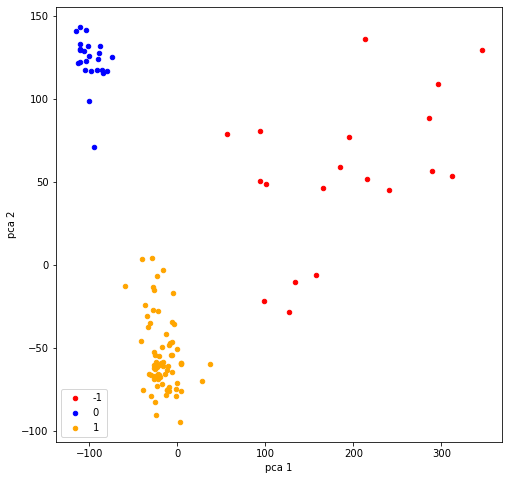

In [101]:
# visualization of clusters after applying DBSCAN clustering
# red points correspond to outliers – images with corrupted labels
show_clusters(PCA_components, cluster)

In [79]:
features_noise.head(10)

,leftear_rightear,snout_tailbase,snout_leftear,snout_rightear,tailbase_leftear,tailbase_rightear,anglesign,angle
0,0.570611,-0.186229,0.114239,-0.216678,-0.271744,-0.135216,-1.907878,-1.765842
1,-0.954158,-0.580997,-1.190209,-0.019469,-0.558747,-0.460093,-1.907878,-1.983015
2,1.367921,-0.318055,0.364131,0.181774,-0.401319,-0.313824,-1.907878,-1.730392
3,0.991897,-0.566494,0.989523,-0.905931,-0.535199,-0.587491,-1.907878,-1.593611
4,0.700087,-0.555510,-0.799171,0.504330,-0.539035,-0.493039,-1.907878,-1.988718
5,-0.970832,-0.595604,-1.219256,0.171809,-0.554515,-0.546233,-1.907878,-1.903696
6,-2.389340,-0.626943,-0.836466,-1.349006,-0.588714,-0.560606,-1.907878,-1.908764
7,-1.384108,-0.523968,-0.872551,-0.495947,-0.492343,-0.484760,-1.907878,-1.880533
8,-0.891409,-0.476430,-0.872489,-0.208555,-0.444131,-0.442019,-1.907878,-1.899222
9,-0.291526,-0.340236,-0.685558,0.578581,-0.370181,-0.303257,-1.907878,-1.707833


In [73]:
print("Number of images in the zero cluster:", (data['label'] == 0).sum())

Number of images in the zero cluster: 24


In [75]:
print("Number of found outliers:",(data['label'] == -1).sum())

Number of found outliers: 19


In [76]:
print("Number of images in the first cluster:",(data['label'] == 1).sum())

Number of images in the first cluster: 73


In [84]:
print('cluster with images with swapped ears:', np.where(data['label'] == 0))
print('cluster with outliers (jitter):', np.where(data['label'] == -1))

cluster with swapped ears: (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22, 102], dtype=int64),)
cluster with outliers (jitter): (array([23, 25, 26, 27, 28, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45], dtype=int64),)


In [83]:
print("Cluster with images with swapped ears:", data[data['label'] == 0].index)

Images with swapped ears: Index(['labeled-data/m4s1/img0000.png', 'labeled-data/m4s1/img0001.png',
       'labeled-data/m4s1/img0002.png', 'labeled-data/m4s1/img0003.png',
       'labeled-data/m4s1/img0004.png', 'labeled-data/m4s1/img0005.png',
       'labeled-data/m4s1/img0006.png', 'labeled-data/m4s1/img0007.png',
       'labeled-data/m4s1/img0008.png', 'labeled-data/m4s1/img0009.png',
       'labeled-data/m4s1/img0010.png', 'labeled-data/m4s1/img0011.png',
       'labeled-data/m4s1/img0012.png', 'labeled-data/m4s1/img0013.png',
       'labeled-data/m4s1/img0014.png', 'labeled-data/m4s1/img0015.png',
       'labeled-data/m4s1/img0016.png', 'labeled-data/m4s1/img0017.png',
       'labeled-data/m4s1/img0018.png', 'labeled-data/m4s1/img0019.png',
       'labeled-data/m4s1/img0020.png', 'labeled-data/m4s1/img0021.png',
       'labeled-data/m4s1/img0022.png', 'labeled-data/m4s1/img0102.png'],
      dtype='object')


In [85]:
print("Cluster with images with jitter:", data[data['label'] == -1].index)

Cluster with images with jitter: Index(['labeled-data/m4s1/img0023.png', 'labeled-data/m4s1/img0025.png',
       'labeled-data/m4s1/img0026.png', 'labeled-data/m4s1/img0027.png',
       'labeled-data/m4s1/img0028.png', 'labeled-data/m4s1/img0031.png',
       'labeled-data/m4s1/img0033.png', 'labeled-data/m4s1/img0034.png',
       'labeled-data/m4s1/img0035.png', 'labeled-data/m4s1/img0036.png',
       'labeled-data/m4s1/img0037.png', 'labeled-data/m4s1/img0038.png',
       'labeled-data/m4s1/img0039.png', 'labeled-data/m4s1/img0040.png',
       'labeled-data/m4s1/img0041.png', 'labeled-data/m4s1/img0042.png',
       'labeled-data/m4s1/img0043.png', 'labeled-data/m4s1/img0044.png',
       'labeled-data/m4s1/img0045.png'],
      dtype='object')


In [86]:
### LR test

# so far we have worked on feature engineering and clustering. Here we wanted to see 
# if a simple supervised classifier can predict the labels (corrupted or not) from the features

# we generated corrupted data and separated the data set into train and test sets
# we are solving binary classification problem – does the image have corrupted label or no

X_train = data.copy()
X_test = data.copy()

X_train = X_train.drop(filenames[14:23])
X_train = X_train.drop(filenames[37:46])
X_train = X_train.drop(filenames[88:116])
    

X_test = X_test.drop(filenames[0:14])
X_test = X_test.drop(filenames[23:37])
X_test = X_test.drop(filenames[46:88])


In [87]:
print("Shape of test set: ", X_test.shape)
print("Shape of train set: ", X_train.shape)

Shape of test set:  (46, 9)
Shape of train set:  (70, 9)


In [88]:
Y_train = np.zeros(X_train.shape[0])
Y_train[0:28] = 1

Y_test = np.zeros(X_test.shape[0])
Y_test[0:18] = 1

In [95]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0, max_iter = 200)
classifier.fit(X_train, Y_train)

predicted_y1 = classifier.predict(X_train)
predicted_y2 = classifier.predict(X_test)

In [96]:
# results of LR method applied to mice dataset

print('LR Accuracy (StandardScaler)')
print('test: {:.4f}'.format(roc_auc_score(Y_test,predicted_y2)))

LR Accuracy (StandardScaler)
test: 0.9544


In [97]:
# importance of the features

for name, importance in zip(list(X_train), np.std(X_train.to_numpy(), 0)*classifier.coef_[0]):
    print(name, "=", importance)

leftear_rightear = -0.020398919393291633
snout_tailbase = -27.60042158207271
snout_leftear = -2.4800044353889845
snout_rightear = -2.62736111113103
tailbase_leftear = -3.487690133304567
tailbase_rightear = 42.40339794750459
anglesign = -0.12847416670196796
angle = -9.860415477336664
label = -0.056895266238114806


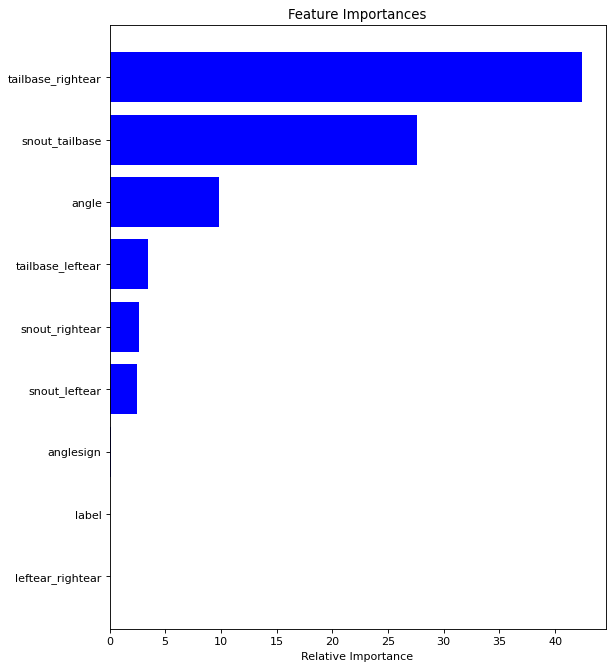

In [98]:
# visualization of the importance of the features

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')

features = list(X_train)
importances = abs(np.std(X_train.to_numpy(), 0)*classifier.coef_[0])
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [99]:
# applying svm model
from sklearn import svm

# create a svm Classifier
clf = svm.SVC(kernel='linear') 

# train the model using the training sets
clf.fit(X_train, Y_train)

# predict the response for test dataset
y_pred = clf.predict(X_test)

In [100]:
# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9347826086956522
